This program calculates scatter properties using (1) micro-faceted approach, (2) assumes a guassian distribution.  It has some limitations that need to worked out.  Namely - the gaussian distribution does not include lambertian distribution possibilities.  Also - at wide viewing angles, and rough structures - the scatter plot goes below the surface (which by definition is not reflection, but rather transmission).  Not sure if I am handling this correctly.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm

Establish Incident Light - Input Incident Angle

In [12]:
i_y = np.arange(0,10)
i_x = np.array([0.0]*len(i_y))
i_angle = -float(raw_input('Input Incident Angle: '))

i_x_1 = i_x_1 = i_x*math.cos(math.radians(i_angle)) + i_y*math.sin(math.radians(i_angle))
i_y_1 = i_y*math.cos(math.radians(i_angle))

Input Incident Angle: 15


Establish Micro-Faceted Slopes - Input Roughness Parameter

In [13]:
scatter_angle = np.arange(-90, 91, 1)

n_data = len(scatter_angle)
n_rnd = 1000

scale = float(raw_input('Input roughness factor (1-30): '))

m = np.random.normal(loc=0, scale=scale, size=n_rnd) 
y = np.zeros((n_data, n_rnd))  

for light_reflected in xrange(n_rnd):
    y[:,light_reflected] = m[light_reflected] * scatter_angle

kde = gaussian_kde(m)
yd = kde(scatter_angle)/np.amax(kde(scatter_angle))

Input roughness factor (1-30): 30


Establish scatter light visualization data

In [14]:
scatter_angle = [math.radians(x) for x in scatter_angle]
Isy = [x*math.cos(y) for x, y in zip(yd, scatter_angle)]
Isx = [x*math.sin(y) for x, y in zip(yd, scatter_angle)]

zero_x =[0]*len(scatter_angle)
zero_y =[0]*len(scatter_angle)

ref_y = [0, 1.5]
ref_x = [0]*len(ref_y)

<function matplotlib.pyplot.show>

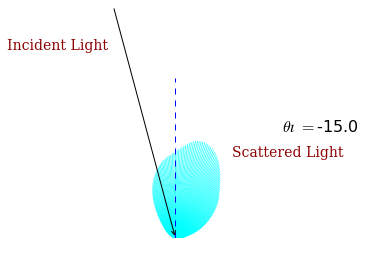

In [15]:
# rotation matrix; x' = xcos(i_angle) + ysin(i_angle); y' = ycos(90-i_angle) - xsin(90-i_angle) for x, y 
Isx = [x*math.cos(math.radians(-i_angle)) + y*math.sin(math.radians(-i_angle)) for x, y in zip(Isx, Isy)]
Isy = [y*math.cos(math.radians(-i_angle)) - x*math.sin(math.radians(-i_angle)) for x, y in zip(Isx, Isy)]

for i in range(len(scatter_angle)):
    plt.plot([zero_x[i], Isx[i]], [zero_y[i], Isy[i]], 'cyan', alpha = 0.7) 
plt.xlim(-1,1)
plt.axis()
plt.gca().set_aspect('equal', adjustable='box')
plt.annotate('', (0, 0), xycoords=('data'), xytext=(i_x_1[-1]*.25, i_y_1[-1]*.25), arrowprops=dict(arrowstyle='->'))
plt.text(1, 1, r'$\theta\i\ =$' +str(i_angle), fontsize=16)
font = {'family':'serif', 'color':'darkred', 'size': 14}
plt.text((i_x_1[-1]*.25)-1, (i_y_1[-1]*.25)-0.4,'Incident Light', fontdict = font)
plt.text(Isx[100]+.15, Isy[100],'Scattered Light', fontdict = font)
plt.ylim(0,2.1)
plt.axis('off')
plt.plot(ref_x, ref_y, '--')
plt.show 

In [6]:
# Philip's Version...

import numpy as np
from scipy.stats.kde import gaussian_kde
from scipy.stats     import norm

                     # import math
radians = np.radians # np.vectorize(math.radians)
sin     = np.sin     # np.vectorize(math.sin)
cos     = np.cos     # np.vectorize(math.cos)

incident_angle = radians(15)
roughness      = 30

def create_vectors(scale, n_rnd=1000):
    """
    returns 2d point matrix of ... needs to understand this
    """
    # create scatter of -90* to 90* in radians
    scatter_angle = radians(np.arange(-90, 91, 1))

    scale = 30
    n_rnd = 1000

    m   = np.random.normal(loc=0, scale=scale, size=n_rnd) 
    kde = gaussian_kde(m)

    yd  = kde(scatter_angle)/np.amax(kde(scatter_angle))

    incident_scatter_vectors = yd * np.array(
      [sin(scatter_angle), cos(scatter_angle)]
    )

    return np.matrix(incident_scatter_vectors)


def rot_matrix(theta):
    """
    returns 2d rotational matrix of angle theta (passed in radians)
    """
    return np.matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])


isv = create_vectors(roughness)
rot = rot_matrix(incident_angle)

ref_y = np.array([0, 1.5])
ref_x = np.zeros(ref_y.shape)

rot*isv

matrix([[ -9.54312160e-01,  -9.58761829e-01,  -9.62919925e-01,
          -9.66785092e-01,  -9.70356062e-01,  -9.73631657e-01,
          -9.76610793e-01,  -9.79292474e-01,  -9.81675797e-01,
          -9.83759949e-01,  -9.85544211e-01,  -9.87027955e-01,
          -9.88210647e-01,  -9.89091843e-01,  -9.89671195e-01,
          -9.89948446e-01,  -9.89923432e-01,  -9.89596083e-01,
          -9.88966422e-01,  -9.88034565e-01,  -9.86800722e-01,
          -9.85265194e-01,  -9.83428379e-01,  -9.81290764e-01,
          -9.78852932e-01,  -9.76115556e-01,  -9.73079403e-01,
          -9.69745333e-01,  -9.66114298e-01,  -9.62187340e-01,
          -9.57965594e-01,  -9.53450287e-01,  -9.48642735e-01,
          -9.43544345e-01,  -9.38156615e-01,  -9.32481132e-01,
          -9.26519572e-01,  -9.20273700e-01,  -9.13745369e-01,
          -9.06936520e-01,  -8.99849180e-01,  -8.92485463e-01,
          -8.84847568e-01,  -8.76937782e-01,  -8.68758472e-01,
          -8.60312092e-01,  -8.51601178e-01,  -8.426283